In [331]:
import numpy as np
import os 
import pandas as pd
import sys
import matplotlib
import math
from scipy.optimize import minimize,approx_fprime

In [381]:
data = np.load("./HW01/data/data.npz")
Xtr = data["Xtr"]
Ytr = data["Ytr"]
Xte = data["Xte"]
Yte = data["Yte"]

In [382]:
class Model:
    def __init__(self,rho,tol):
        self.rho=rho
        self.K=self.rho.size
        self.tol=tol
        self.theta_hat=[]
        self.method="L-BFGS-B"

    def f(self,theta,X):
        if len(theta)==2*self.K+1:
            b=theta[-1]
            w=theta[:self.K]
            phi=theta[self.K:2*self.K]
            fx=[]
            for x in X:
                val=0
                for k in range(self.K):
                    val+=w[k]*math.cos((2*math.pi*x/self.rho[k])-phi[k])
                fx.append(b+val)
            return fx
    
    def risk(self,theta,X,Y):
        Ypred=np.array(self.f(theta,X))
        print(Ypred)
        loss=(np.array(Y)-Ypred)**2
        return np.sum(loss)/len(X)
    
    def riskgrad(self,theta,X,Y):
        Y_pred=np.array(self.f(theta,X))
        riskgrad=np.zeros(2*self.K+1)
        for i in range(len(X)):
            loss=Y_pred[i]-Y[i]
            for k in range(self.K):
                riskgrad[k]+=loss*math.cos(2*math.pi*X[i]/self.rho[k]-theta[k+self.K])
            for k in range(self.K,2*self.K):
                riskgrad[k]+=loss*theta[k-self.K]*math.sin(2*math.pi*X[i]/self.rho[k-self.K]-theta[k])
            riskgrad[-1]+=loss
        return riskgrad*2/len(X)
    
    def fit(self,X,Y):
        x0=np.zeros(2*self.K+1)
        minimizing=minimize(self.risk,x0,args=(X,Y),tol=self.tol,method=self.method,options={"disp":1})
        self.theta_hat=minimizing.x
        return self.theta_hat

In [383]:
Xold=[20,40]
Yold=[0,2.5]
rho=np.array([50,25])
theta=np.array([0.5,0.75,-0.25,0.75,1])
model1=Model(rho,1e-6)
risk=model1.risk(theta,Xold,Yold)
print(risk)


1.978386269667155


In [384]:
x0=np.zeros(2*K+1)
x0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [385]:
rho=np.array([12.42, 12.00, 12.66, 23.93, 25.82, 6.21, 4.14, 6.00, 6.10])
tol=1e-6
model=Model(rho,tol)
theta0=np.ones(2*model.K+1)

##Q6a

In [386]:
risk=model.risk(theta0,Xtr,Ytr)
print(risk)

3180.7890917719433


##Q6b

In [387]:
riskgrad=model.riskgrad(theta0,Xtr,Ytr)
print(riskgrad)

[ 0.83104621  1.1705249   1.07839678  0.86892169  0.95695649  0.94785829
  1.0144125   0.88121832  0.90573908 -0.55376932 -0.18509614 -0.06564822
 -0.03534974 -0.01394138 -0.04992698 -0.00741326  0.06708419 -0.05207442
 -0.79419585]


In [388]:
from scipy.optimize import check_grad

chk1=np.sum(np.array([check_grad(model.risk,model.riskgrad,theta0,Xtr[i],Ytr[i]) for i in range(len(Xtr))]))/len(Xtr)
print(chk1)
eps = np.sqrt(np.finfo(float).eps)
print(eps)
chk=np.sum(np.array([approx_fprime(theta0,model.risk,eps,Xtr[i],Ytr[i]) for i in range(len(Xtr))]),0)/len(Xtr)
print(chk)

3.059769914146715e-07
1.4901161193847656e-08
[ 0.83104621  1.1705249   1.07839679  0.8689217   0.9569565   0.9478583
  1.0144125   0.88121832  0.90573909 -0.55376932 -0.18509614 -0.06564822
 -0.03534974 -0.01394137 -0.04992698 -0.00741326  0.06708419 -0.05207442
 -0.79419584]


##Q6c

In [389]:
theta_hat=model.fit(Xtr,Ytr)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47626D+03    |proj g|=  1.88815D+03


 This problem is unconstrained.



At iterate    1    f=  2.60112D+02    |proj g|=  5.44138D+02

At iterate    2    f=  1.49957D+02    |proj g|=  1.35277D+00

At iterate    3    f=  1.49954D+02    |proj g|=  6.61788D-01

At iterate    4    f=  1.49953D+02    |proj g|=  5.18980D-03

At iterate    5    f=  1.49953D+02    |proj g|=  5.51381D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      5      6      1     0     0   5.514D-04   1.500D+02
  F =   149.95276874900583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [390]:
print(theta_hat)

[-1.11371156e-07  7.17747688e-09 -1.79823043e-07 -2.57218320e-07
 -1.11059137e-07  3.93862490e-07 -3.12394679e-07  8.85399518e-07
  6.62024294e-07  1.63617055e-07  3.19100461e-09 -2.96017740e-10
  5.46115515e-07 -3.70539013e-09  3.29100761e-07  4.03739960e-07
 -5.05765639e-09 -7.79089565e-09  1.40487649e+00]


##Q6d

In [391]:
aslosstr=model.risk(theta_hat,Xtr,Ytr)
aslosste=model.risk(theta_hat,Xte,Yte)
print("Training loss:{}  Test loss:{}".format(aslosstr,aslosste))

Training loss:149.95276874900583  Test loss:165.58732873099905


18.759658987954804


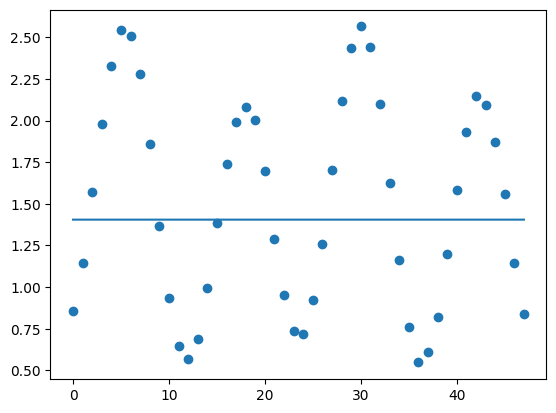

In [392]:
import matplotlib.pyplot as plt
Xe=Xtr[:48]
Ye=Ytr[:48]
Ye_pred=model.f(theta_hat,Xe)
plt.scatter(Xe,Ye)
plt.plot(Xe,Ye_pred)
print(model.risk(theta_hat,Xe,Ye))

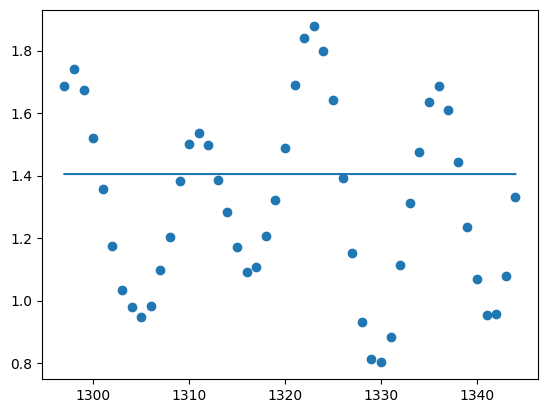

4.4263463764463635


In [393]:
import matplotlib.pyplot as plt
Xe=Xte[-48:]
Ye=Yte[-48:]
Ye_pred=model.f(theta_hat,Xe)
plt.scatter(Xe,Ye)
plt.plot(Xe,Ye_pred)
plt.show()
print(model.risk(theta_hat,Xe,Ye))